In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
from scipy.special import comb
from scipy.linalg import expm, sinm, cosm
from CVQS import stategen as sg


# Functions from @Mateen Ulhaq and @karlo
def set_axes_equal(ax: plt.Axes):
    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    _set_axes_radius(ax, origin, radius)

def _set_axes_radius(ax, origin, radius):
    x, y, z = origin
    ax.set_xlim3d([x - radius, x + radius])
    ax.set_ylim3d([y - radius, y + radius])
    ax.set_zlim3d([z - radius, z + radius])

In [2]:
n=64
t=1/(n**(1/3))
#t=1/(n**(1/8))
#t=1/(n**(1/10))
#t=1/(n**(1/12))
#t=0
#t=1/(n**(1/2))
DD=expm(-(1j)*t*( sg.JZm(n)@sg.JZm(n) ))

def state(n,phiang):
    n=int(n)
    xx=sg.su2cs(0,np.pi/2,n)
    tw=DD
    op0=sg.JXm(n)
    rot=expm(-(1j)*phiang*( op0 ))
    return rot@tw@xx

def untwstate(n,phiang):
    n=int(n)
    xx=sg.su2cs(0,np.pi/2,n)
    tw=DD
    untw=np.conj(np.transpose(tw))
    op0=sg.JXm(n)
    rot=expm(-(1j)*phiang*( op0 ))
    return untw@rot@tw@xx

def overhus(theta,phi,n,phiang):
    gg=state(n,phiang)
    vv=sg.su2cs(-phi,theta,n)
    return np.abs(np.conj(vv)@gg)**2

def overhusuntw(theta,phi,n,phiang):
    gg=untwstate(n,phiang)
    vv=sg.su2cs(phi,theta,n)
    return np.abs(np.conj(vv)@gg)**2
    

In [3]:
n=64
phiang=0
grid=200
theta = np.linspace(0, np.pi-.002, grid)
phi = np.linspace(0, 2*np.pi, grid)
theta,phi = np.meshgrid(theta,phi)
# The Cartesian coordinates of the unit sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

ang1 = np.linspace(0, np.pi-.002, grid)
ang2 = np.linspace(0, 2*np.pi, grid)

fcolors2=np.zeros((grid,grid))
for j in range(len(ang1)):
    for k in range(len(ang2)):
        fcolors2[j][k]=overhus(ang1[j], ang2[k],n,phiang)
fmax, fmin = fcolors2.max(), fcolors2.min()
fcolors2 = (fcolors2 - fmin)/(fmax - fmin)

/media/ty/Fortress_L3/Quantum metrology research/Compiling and sensing DR - Mike Martin/Writeups/Heisenberg limit with total spin/Scripts/CVQS/stategen.py:324: RuntimeWarning: overflow encountered in square
  f=f/np.sqrt(np.sum(np.abs(f)**2))


Text(0.5, 0.5, 'y')

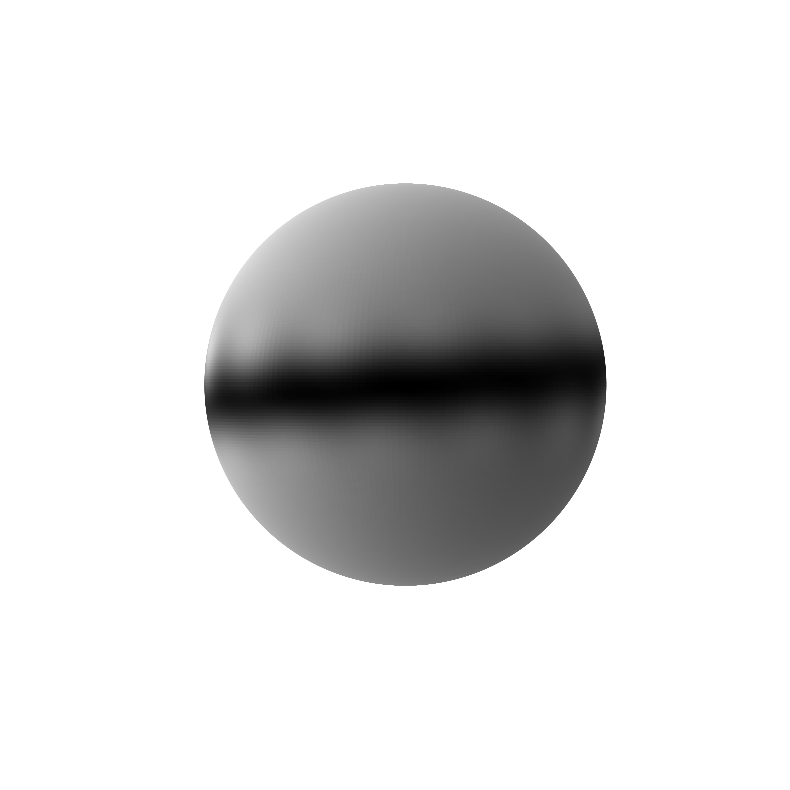

In [4]:
fig=plt.figure(figsize=(10,10))
#fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.binary(np.transpose(fcolors2)))
ax.set_axis_off()
#ax.grid(True)
# Turn off the axis planes
#ax.set_axis_off()

ax.view_init(0,0)
ax.set_box_aspect([1,1,1]) # IMPORTANT - this is the new, key line
# ax.set_proj_type('ortho') # OPTIONAL - default is perspective (shown in image above)
set_axes_equal(ax) # IMPORTANT - this is also required
#plt.axis('off')
plt.xlabel('x')
plt.ylabel('y')
#plt.show()
#plt.savefig('over_sq.pdf',format='pdf',bbox_inches='tight') 

In [17]:
n=100
phiang=np.pi/6
grid=200
theta = np.linspace(0, np.pi-.002, grid)
phi = np.linspace(0, 2*np.pi, grid)
theta,phi = np.meshgrid(theta,phi)
# The Cartesian coordinates of the unit sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

ang1 = np.linspace(0, np.pi-.002, grid)
ang2 = np.linspace(0, 2*np.pi, grid)

fcolors2=np.zeros((grid,grid))
for j in range(len(ang1)):
    for k in range(len(ang2)):
        fcolors2[j][k]=overhus(ang1[j], ang2[k],n,phiang)
fmax, fmin = fcolors2.max(), fcolors2.min()
fcolors2 = (fcolors2 - fmin)/(fmax - fmin)

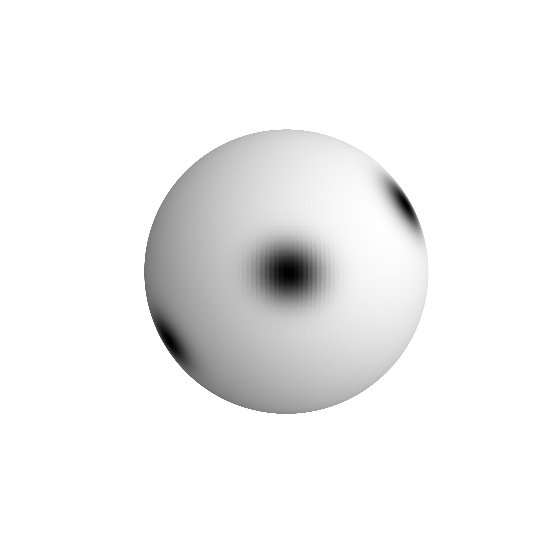

In [18]:
fig=plt.figure(figsize=(10,10))
#fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.binary(np.transpose(fcolors2)))
ax.set_axis_off()
#ax.grid(True)
# Turn off the axis planes
#ax.set_axis_off()

ax.view_init(0,-180)
ax.set_box_aspect([1,1,1]) # IMPORTANT - this is the new, key line
# ax.set_proj_type('ortho') # OPTIONAL - default is perspective (shown in image above)
set_axes_equal(ax) # IMPORTANT - this is also required
#plt.axis('off')
plt.xlabel('x')
plt.ylabel('y')
#plt.show()
plt.savefig('over_hus2',format='pdf',bbox_inches='tight') 

In [19]:
n=100
phiang=np.pi/6
grid=200
theta = np.linspace(0, np.pi-.002, grid)
phi = np.linspace(0, 2*np.pi, grid)
theta,phi = np.meshgrid(theta,phi)
# The Cartesian coordinates of the unit sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

ang1 = np.linspace(0, np.pi-.002, grid)
ang2 = np.linspace(0, 2*np.pi, grid)

fcolors2=np.zeros((grid,grid))
for j in range(len(ang1)):
    for k in range(len(ang2)):
        fcolors2[j][k]=overhusuntw(ang1[j], ang2[k],n,phiang)
fmax, fmin = fcolors2.max(), fcolors2.min()
fcolors2 = (fcolors2 - fmin)/(fmax - fmin)

Text(0.5, 0.5, 'y')

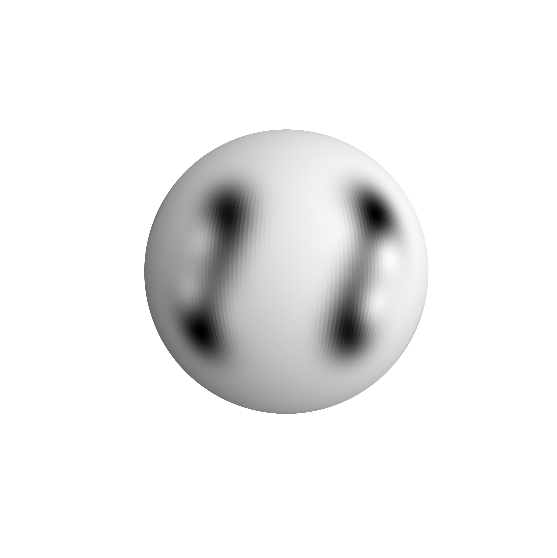

In [23]:
fig=plt.figure(figsize=(10,10))
#fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.binary(np.transpose(fcolors2)))
ax.set_axis_off()
#ax.grid(True)
# Turn off the axis planes
#ax.set_axis_off()

ax.view_init(0,180)
ax.set_box_aspect([1,1,1]) # IMPORTANT - this is the new, key line
# ax.set_proj_type('ortho') # OPTIONAL - default is perspective (shown in image above)
set_axes_equal(ax) # IMPORTANT - this is also required
#plt.axis('off')
plt.xlabel('x')
plt.ylabel('y')
#plt.show()
#plt.savefig('over_hus3',format='pdf',bbox_inches='tight') 